In [1]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import random
import math
import csv
import operator

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [4]:
df['target']=df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
df.to_csv('mydatafile.csv',header=None,index=False)

In [5]:
def loadmyfile(filename,split,trainingset=[],testset=[]):
    with open(filename,'r') as csvfile:
        lines=csv.reader(csvfile)
        dataset=list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y]=float(dataset[x][y])
            if random.random()<split:
                trainingset.append(dataset[x])
            else:
                testset.append(dataset[x])

In [6]:
trainingset=[]
testset=[]
split=0.67
loadmyfile('mydatafile.csv',split,trainingset,testset)
print('Training Set : ',repr(len(trainingset)))
print('Test Set : ',repr(len(testset)))

Training Set :  103
Test Set :  46


In [7]:
help(repr)

Help on built-in function repr in module builtins:

repr(obj, /)
    Return the canonical string representation of the object.
    
    For many object types, including most builtins, eval(repr(obj)) == obj.



In [8]:
def euclideandistances(instance1,instance2,length):
    distance=0
    for x in range(length):
        distance+=pow((instance1[x]-instance2[x]),2)
    return math.sqrt(distance)

In [9]:
def neighbours(trainingset,testinstance,k):
    distances=[]
    length=len(testinstance)-1
    for x in range(len(trainingset)):
        dist=euclideandistances(testinstance,trainingset[x],length)
        distances.append((trainingset[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours1=[]
    for x in range(k):
        neighbours1.append(distances[x][0])
    return neighbours1

In [10]:
def getresponse(neighbours):
    votes={}
    for x in range(len(neighbours)):
        response=neighbours[x][-1]
        if response in votes:
            votes[response]+=1
        else:
            votes[response]=1
    sortedvalues=sorted(votes.items(),key=operator.itemgetter(1),reverse=True)
    return sortedvalues[0][0]

In [11]:
def getaccuracy(testset,predictions):
    sum=0
    for x in range(len(testset)):
        if testset[x][-1]==predictions[x]:
            sum+=1
    return(sum/float(len(testset)))*100.0

In [12]:
predictions=[]
k=3
for x in range(len(testset)):
    neighbours1=neighbours(trainingset,testset[x],k)
    result=getresponse(neighbours1)
    predictions.append(result)
    print('Predicted : '+repr(result)+' Actual : '+repr(testset[x][-1]))
accuracy=getaccuracy(testset,predictions)
# plt.pyplot(accuracy)
print('Accuracy : '+repr(accuracy)+'%')

Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'setosa' Actual : 'setosa'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'versicolor' Actual : 'versicolor'
Predicted : 'virginica' Actual : 'versi

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets

In [15]:
k=15
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
h=0.2
lightcolor=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
boldcolor=ListedColormap(['#FF0000','#00FF00','#0000FF'])
clf=neighbors.KNeighborsClassifier(k,weights='uniform')
clf.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

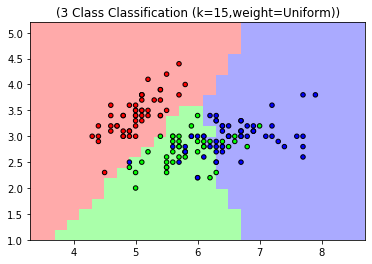

In [22]:
xmin,xmax=X[:,0].min()-1,X[:,0].max()+1
ymin,ymax=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=lightcolor)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=boldcolor,edgecolor='K',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("(3 Class Classification (k=15,weight=Uniform))")
plt.show()